## Post process 80/20 train/test


In [1]:
# from mlclouds.autoxval import XVal, AutoXVal, CONFIG
from mlclouds.autoxval import surf_meta as sm
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,6)
plt.style.use('ggplot')

In [2]:
def plot_stats(stats, title):
    ylims = {'DNI': [45, 165], 'GHI': [10, 70]}
    fig, axes = plt.subplots(1, 2)
    for i, var in enumerate(['GHI', 'DNI']):
        ax = axes[i]
        s = stats
        stats_phygnn = s[(s.Model == 'PhyGNN') & (s.Variable == var)
             & (s.Condition == 'Missing Cloud Data')]
        stats_base = s[(s.Model == 'Baseline') & (s.Variable == var)
             & (s.Condition == 'Missing Cloud Data')]
        stats_adjusted = s[(s.Model == 'Adjusted') & (s.Variable == var)
             & (s.Condition == 'Missing Cloud Data')]
        stats_base.index = stats_base.Site
        stats_phygnn.index = stats_base.Site
        stats_adjusted.index = stats_adjusted.Site
        ax.plot(stats_base['MAE (%)'], marker='', label='Baseline')
        #ax.plot(stats_base['MAE (%)'], marker='x', linestyle=':', label='Adjusted')
        ax.plot(stats_phygnn['MAE (%)'], marker='o', label='PhyGNN')
        ax.set_ylabel(f'{var} MAE (%)')
        ax.set_ylim(ylims[var])
        ax.set_title(title[i])
        #print(stats_phygnn)
    plt.legend()
    plt.show()

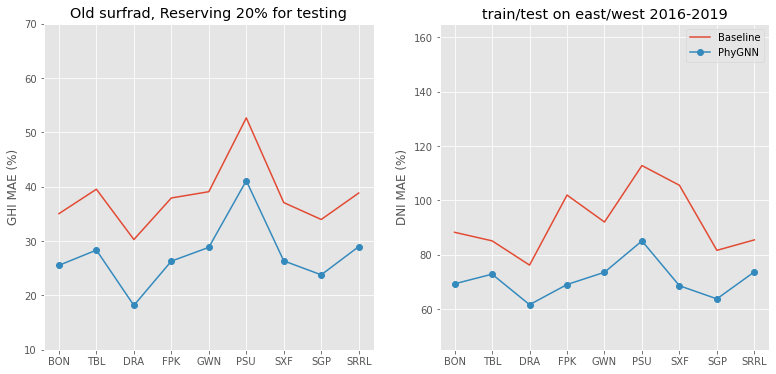

In [4]:
# All files, older version of srrl data
stats = pd.read_csv('stats/stats_all_old_files.csv')
plot_stats(stats, ['Old surfrad, Reserving 20% for testing', 'train/test on east/west 2016-2019'])

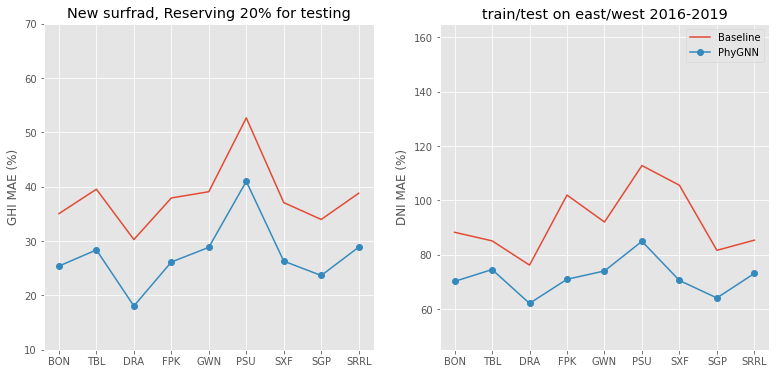

In [5]:
# New surf srrl data from Aron on 2021/2/3, still using older phygnn between y_true and
# y_predicted flip
stats = pd.read_csv('stats/stats_all_new_files_old_phygnn.csv')
plot_stats(stats, ['New surfrad, Reserving 20% for testing', 'train/test on east/west 2016-2019'])

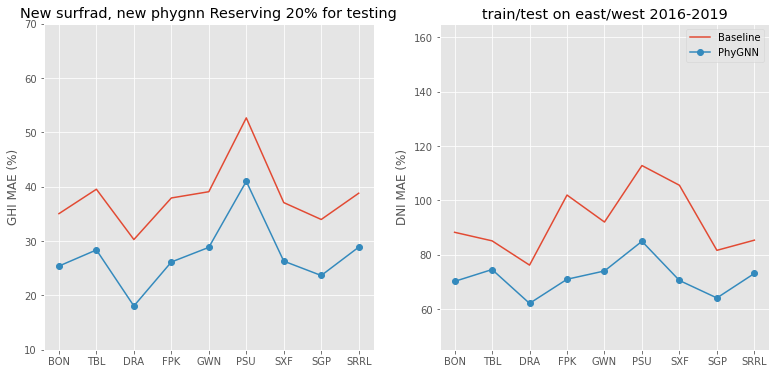

In [6]:
# New surf srrl data from Aron on 2021/2/3, using update mlclouds and phygnn
stats = pd.read_csv('stats/stats_all_new_files_new_phygnn.csv')
plot_stats(stats, ['New surfrad, new phygnn Reserving 20% for testing', 'train/test on east/west 2016-2019'])